In [82]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [83]:
import numpy as np
import pandas as pd

In [84]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [85]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [86]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [87]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [88]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [89]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [90]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

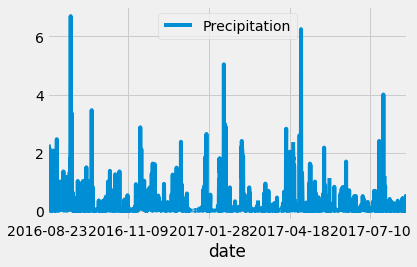

In [91]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
query = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date)
date_year = str((dt.datetime.strptime(query.all()[-1][0], '%Y-%m-%d') 
                 - dt.timedelta(days=365)).date())


# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

query_yr = query.filter(Measurement.date >= date_year)

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.read_sql(query_yr.statement, conn, index_col='date')

# Sort the dataframe by date
df = df.sort_index()
df = df.rename(columns={'prcp':'Precipitation'})

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x_compat = True)
plt.tight_layout()
plt.show()

In [92]:
oneyear= dt.date(2017, 8, 23) -dt.timedelta(days=365)
print(oneyear)

2016-08-23


![precipitation](Images/precipitation.png)

In [93]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [94]:
# Design a query to show how many stations are available in this dataset?
inspectors = inspect(engine)
inspectors.get_table_names()

columns = inspectors.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
    
session.query(func.count(Station.station)).all()

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[(9)]

In [95]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order
MostActiveStations = session.query(Measurement.station, func.count(Measurement.station)).\
                                group_by(Measurement.station).\
                                order_by(func.count(Measurement.date).desc()).all()
MostActiveStations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [96]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
lowest_temp = session.query(func.min(Measurement.tobs), (func.max(Measurement.tobs)), (func.avg(Measurement.tobs))).\
                filter(Measurement.station == "USC00519281").all()
lowest_temp


[(54.0, 85.0, 71.66378066378067)]

In [97]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
all_temp = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date > '2016-08-31').all()
all_temp


[(80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 (65.0),
 (68.0),
 (62.0),
 (75.0),
 (70.0),
 (69.0),
 (76.0),
 (76.0),
 

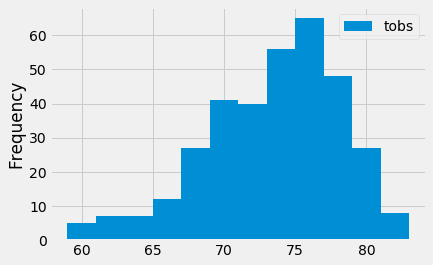

In [98]:
histo = pd.DataFrame(all_temp, columns=['tobs'])
histo.plot.hist(bins=12)

In [102]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
   
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-01-27', '2012-02-05'))

[(60.0, 68.42857142857143, 76.0)]


In [103]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
tmin,tavg,tmax=calc_temps('2011-01-27', '2011-02-05')[0]
print(tmin,tavg,tmax)
# I Think i should have used a time Delta 

56.0 67.53086419753086 76.0


/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


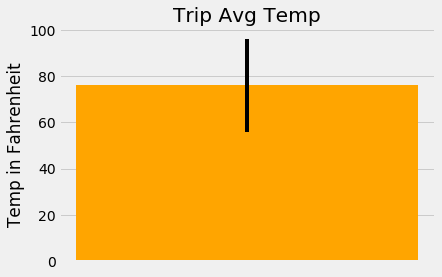

In [101]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig,ax = plt.subplots()
x = 1
y = tmax-tmin
bar = ax.bar(x,tmax,yerr = y, color="orange", align="center")
ax.set(xticks = range(x),xticklabels = "a",title = "Trip Avg Temp", ylabel = "Temp in Fahrenheit")
fig.show()

In [78]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [79]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [80]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [81]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


<IPython.core.display.Javascript object>


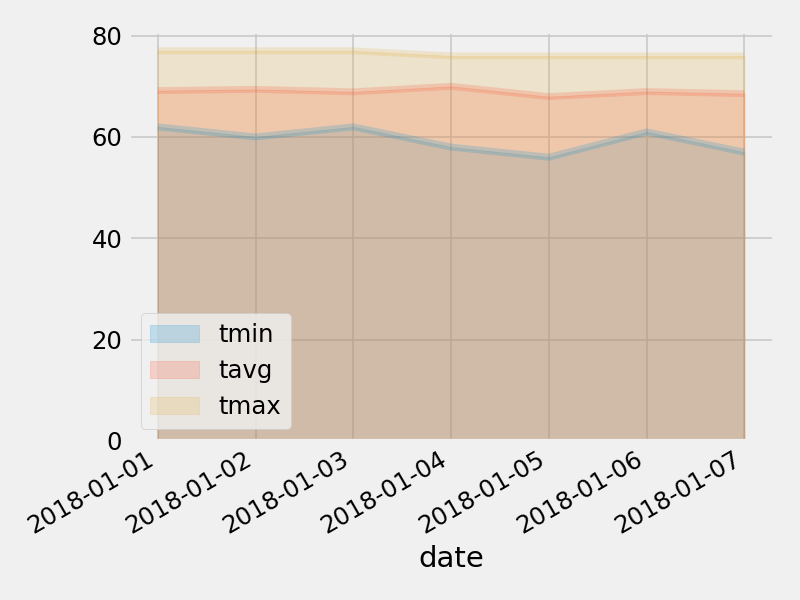

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
